In [10]:
# In your notebook (01_eda_and_data_understanding.ipynb)

import os

print("Notebook's current working directory:", os.getcwd())
print("Contents of current directory:", os.listdir('.'))

Notebook's current working directory: d:\10academy\week_3_insurance_risk_analytics\notebooks
Contents of current directory: ['01_eda_and_data_understanding.ipynb', '02_hypothesis_testing.ipynb', '03_model_development.ipynb', 'EDA.ipynb', 'README.md', '__init__.py', '__pycache__']


--- Loading Raw Data (MachineLearningRating_v3.txt) ---


d:\10academy\week_3_insurance_risk_analytics\src\utils.py:25: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|', encoding='utf-8')


Raw data loaded successfully from Data/MachineLearningRating_v3.txt. Shape: (1000098, 52)

--- Initial Data Summary ---

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Ge

d:\10academy\week_3_insurance_risk_analytics\src\utils.py:142: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_premium'].fillna(0, inplace=True)
d:\10academy\week_3_insurance_risk_analytics\src\utils.py:143: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

Key numerical columns converted to numeric.
Filled NaN in custom_value_estimate with median: 220000.0
Filled NaN in capital_outstanding with median: 0.0
Filled NaN in kilowatts with median: 111.0
Filled NaN in cubic_capacity with median: 2694.0
Filled NaN in gender with 'Unknown'.
Filled NaN in marital_status with 'Unknown'.


d:\10academy\week_3_insurance_risk_analytics\src\data_tools.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
d:\10academy\week_3_insurance_risk_analytics\src\data_tools.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Filled NaN in vehicle_type with 'Unknown'.
Filled NaN in body_type with 'Unknown'.
Filled NaN in make with 'Unknown'.
Filled NaN in model with 'Unknown'.

--- Data after Preprocessing ---

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   underwritten_cover_id        1000098 non-null  int64         
 1   policy_id                    1000098 non-null  int64         
 2   transaction_month            1000098 non-null  datetime64[ns]
 3   is_vat_registered            1000098 non-null  bool          
 4   citizenship                  1000098 non-null  object        
 5   legaltype                    1000098 non-null  object        
 6   title                        1000098 non-null  object        
 7   language                     1000098 non-null  object        
 8   bank 

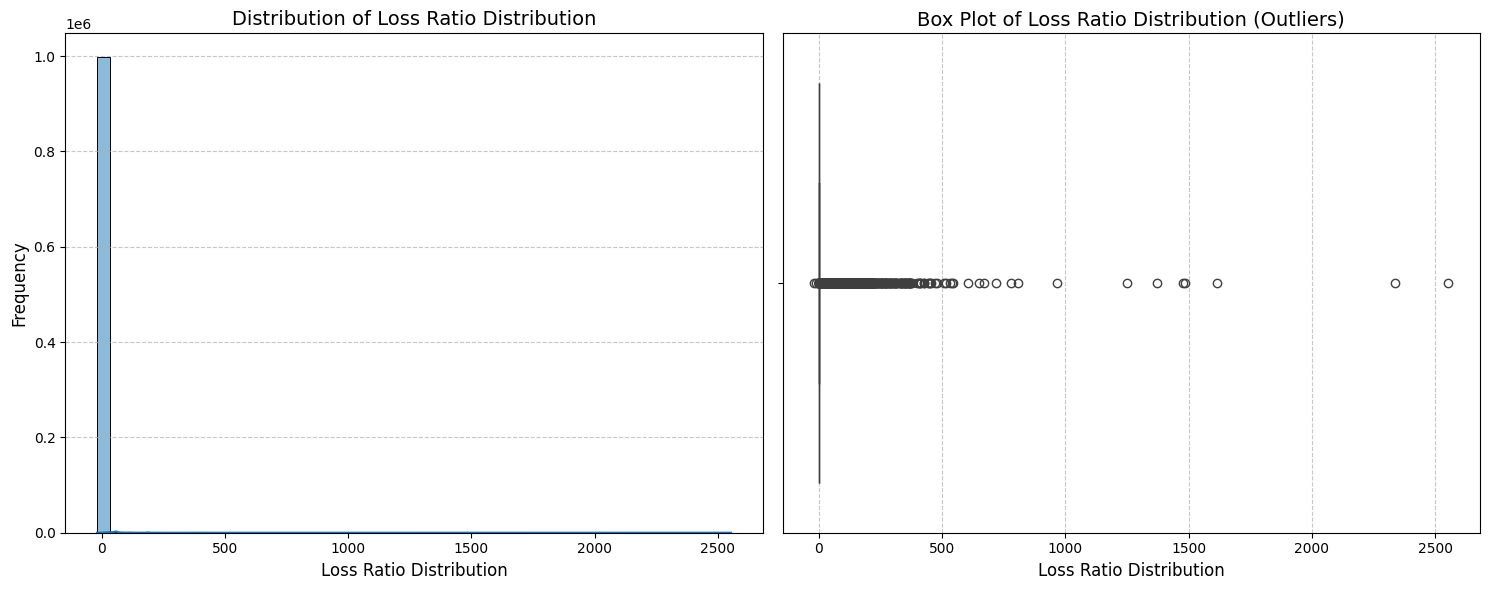

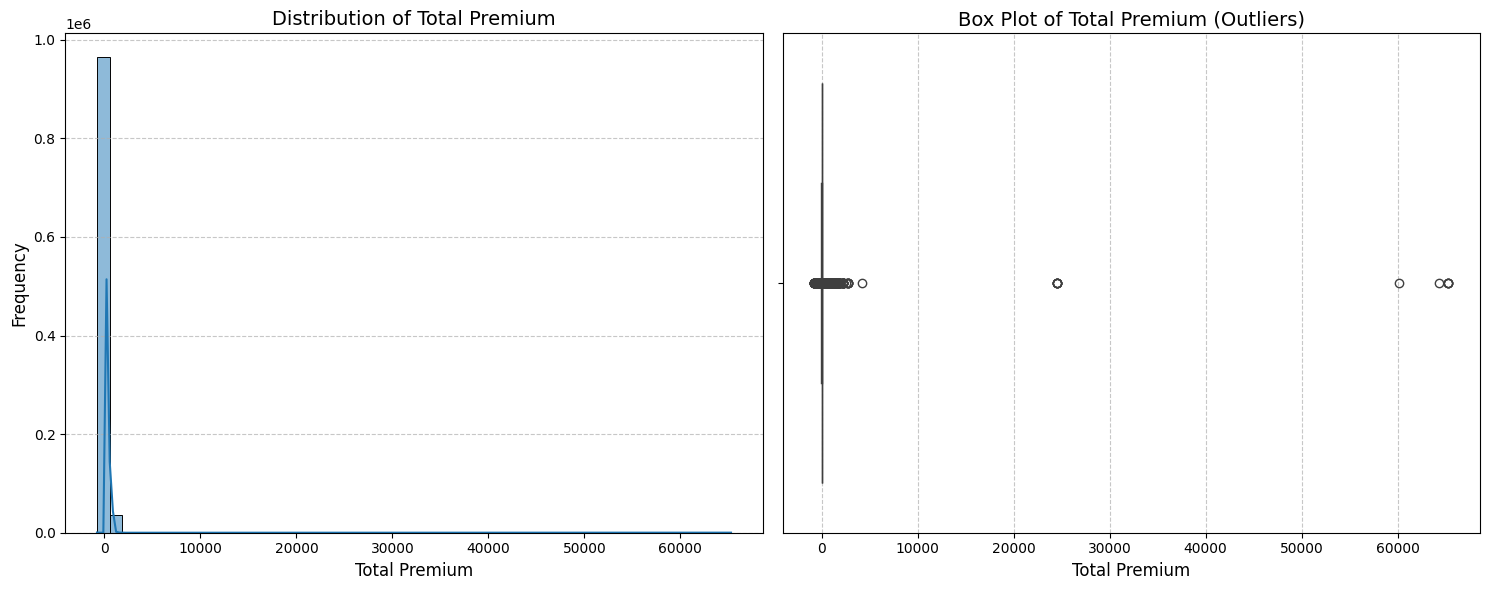

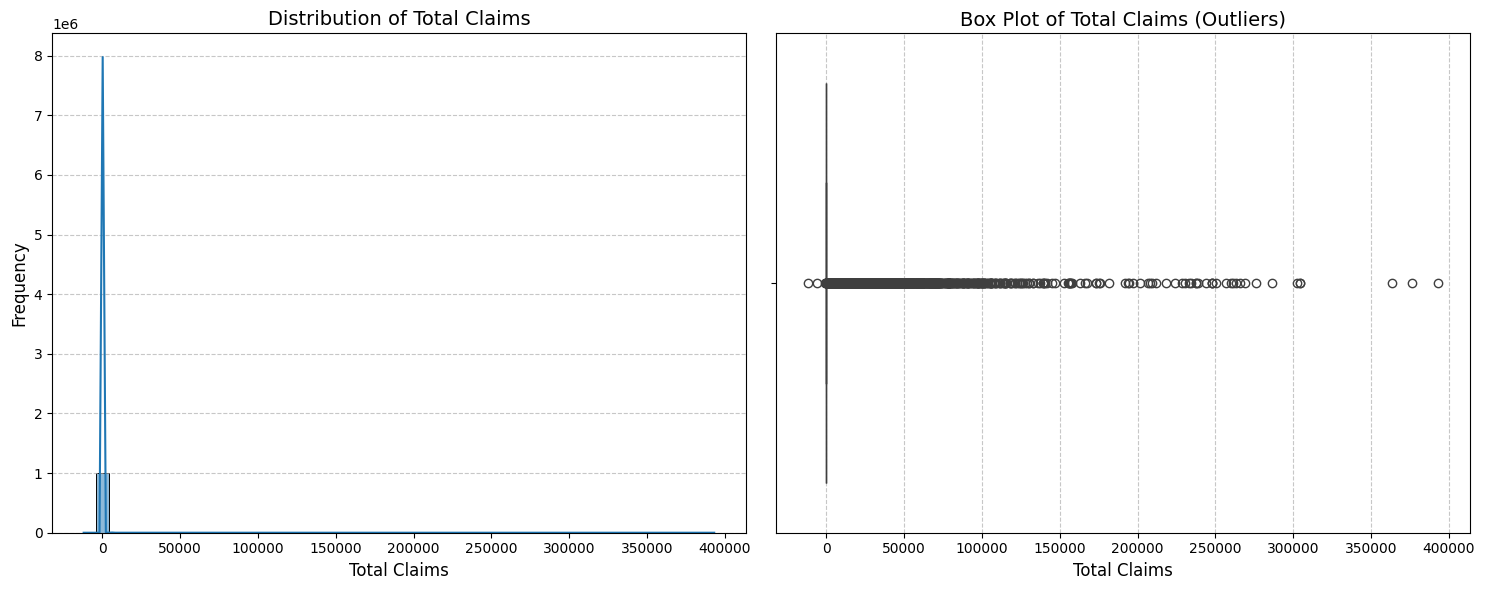

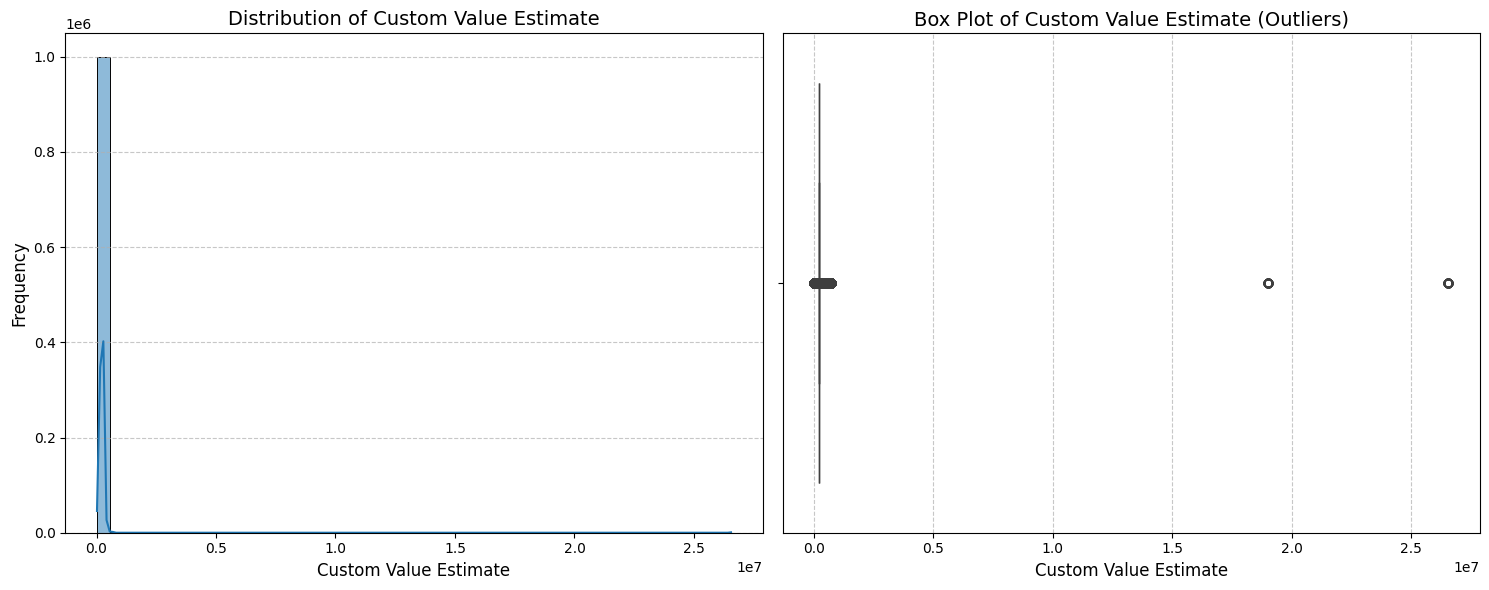

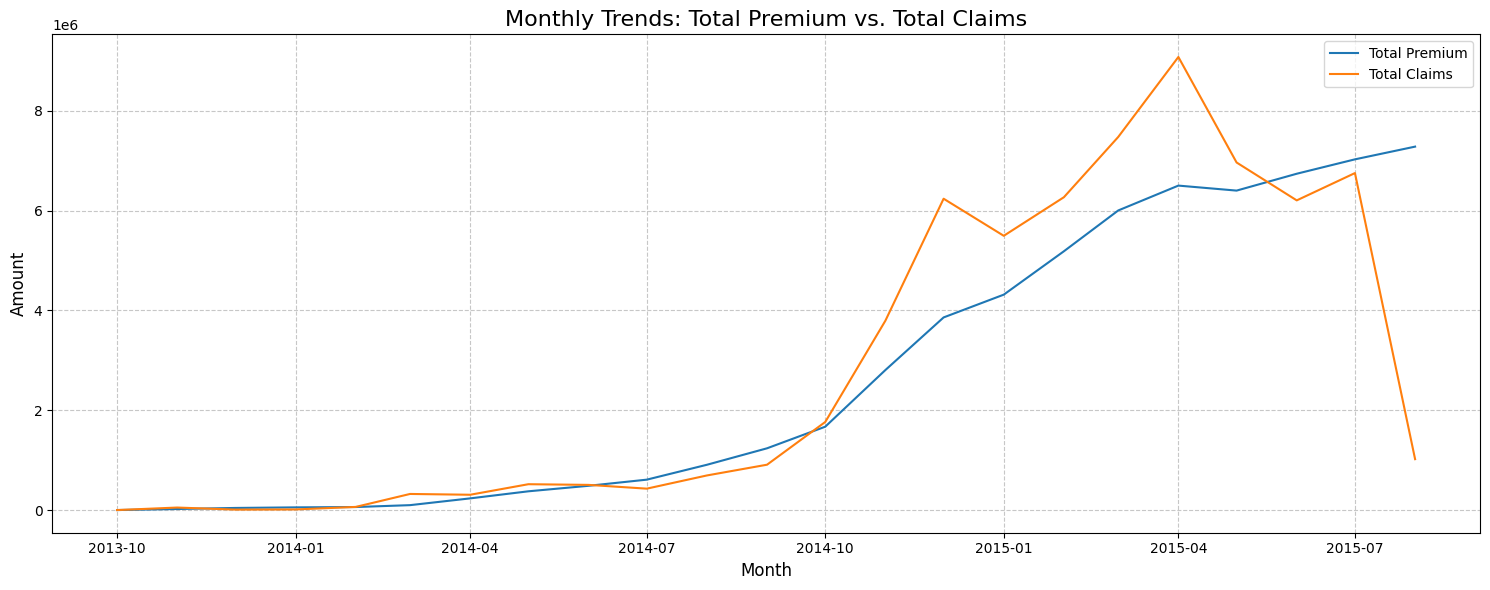

C:\Users\eep\AppData\Local\Temp\ipykernel_25356\810751173.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_summary['monthly_loss_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True) # Handle division by zero resulting in inf


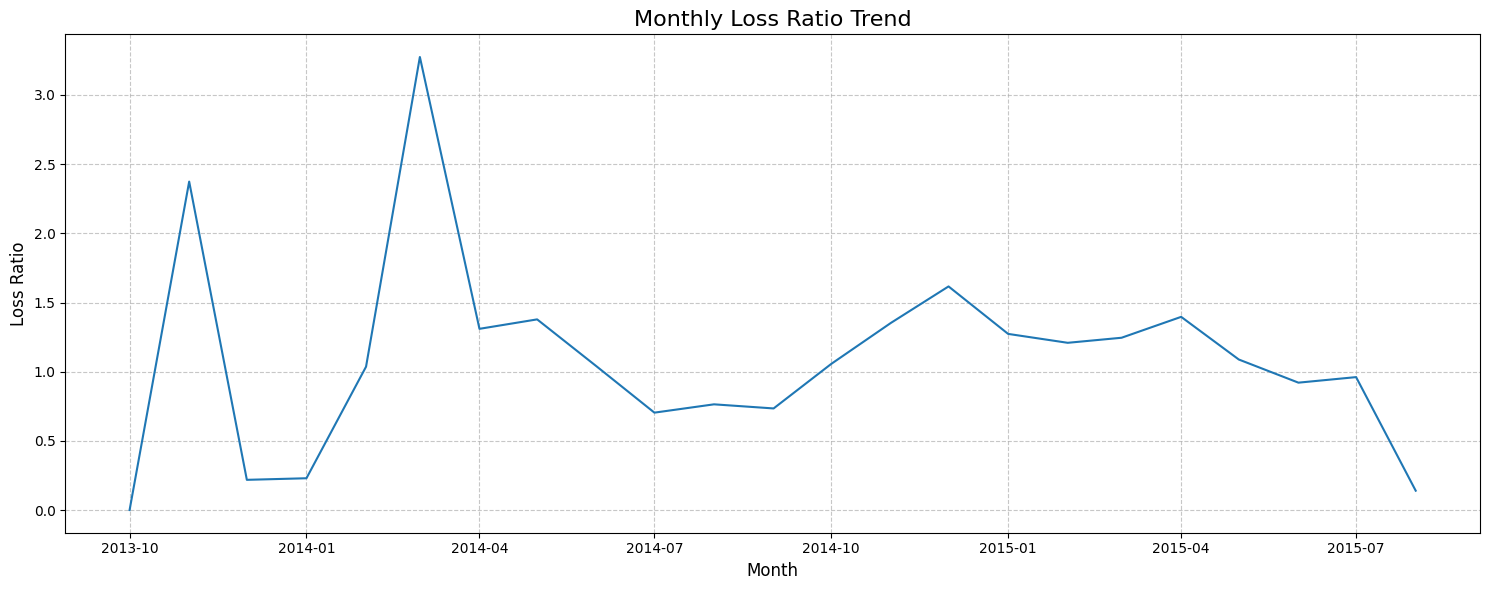

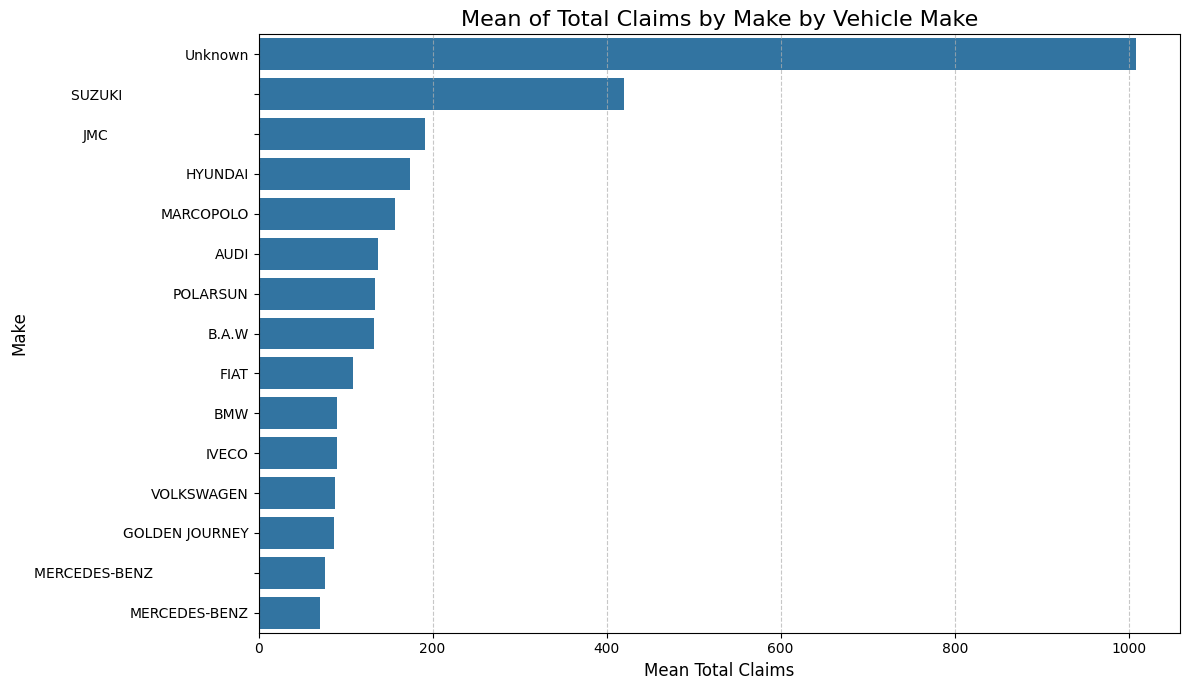

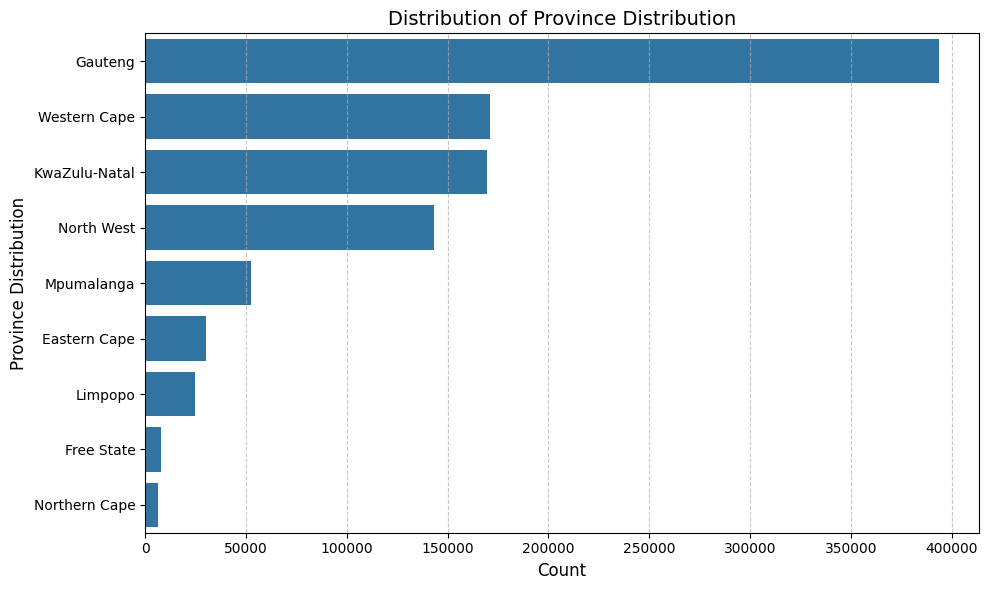

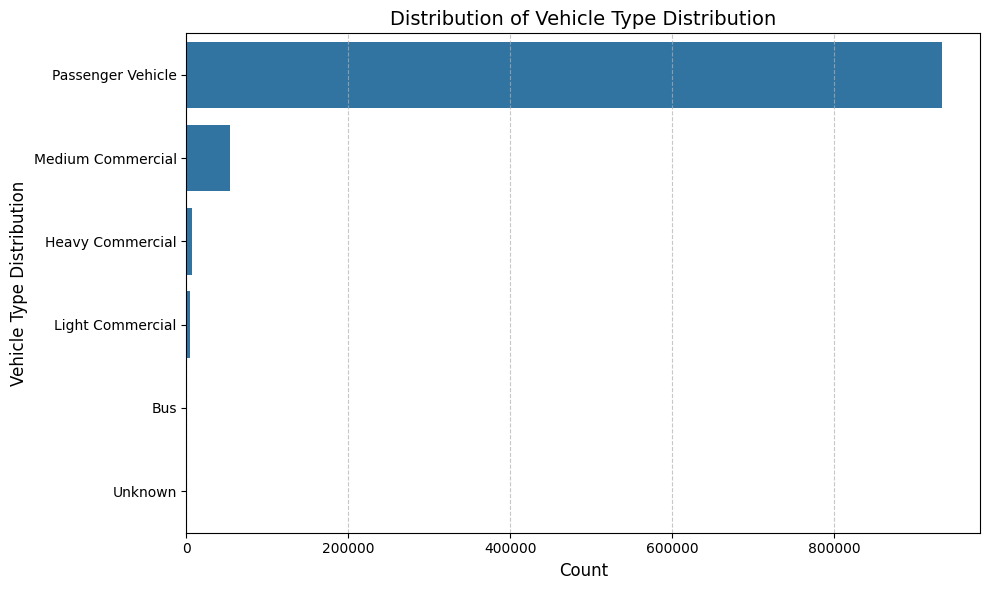

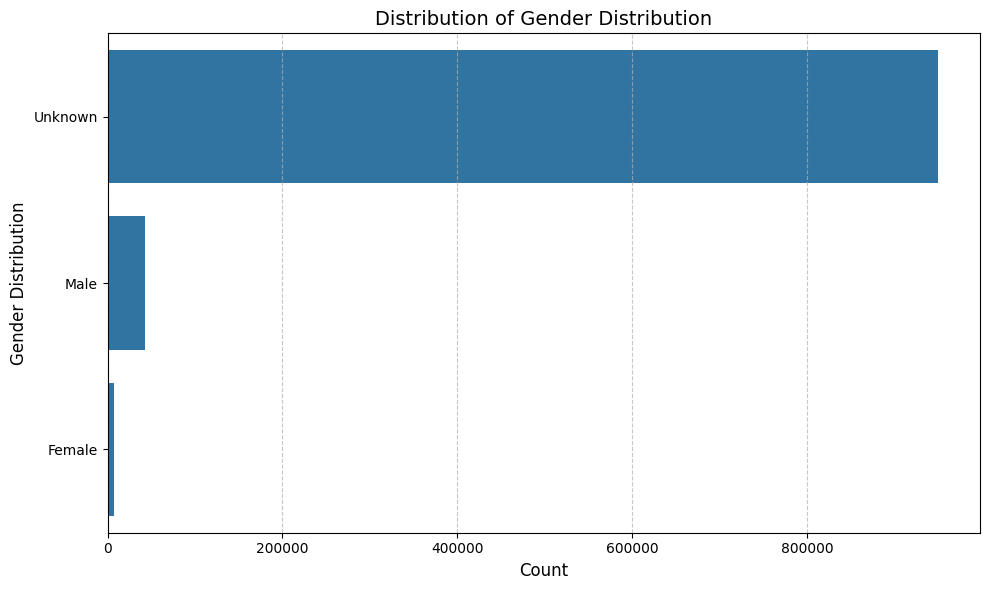

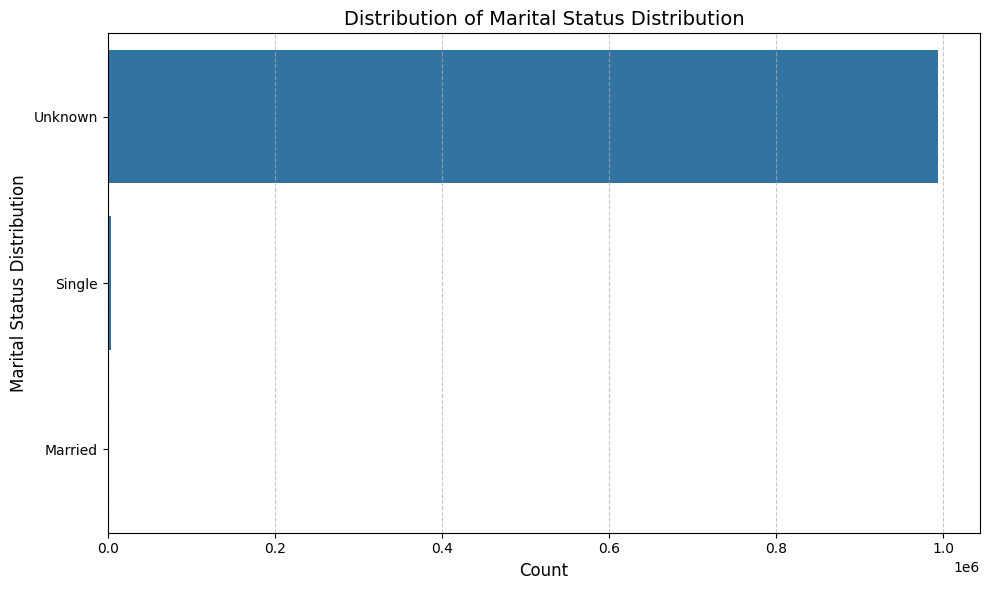

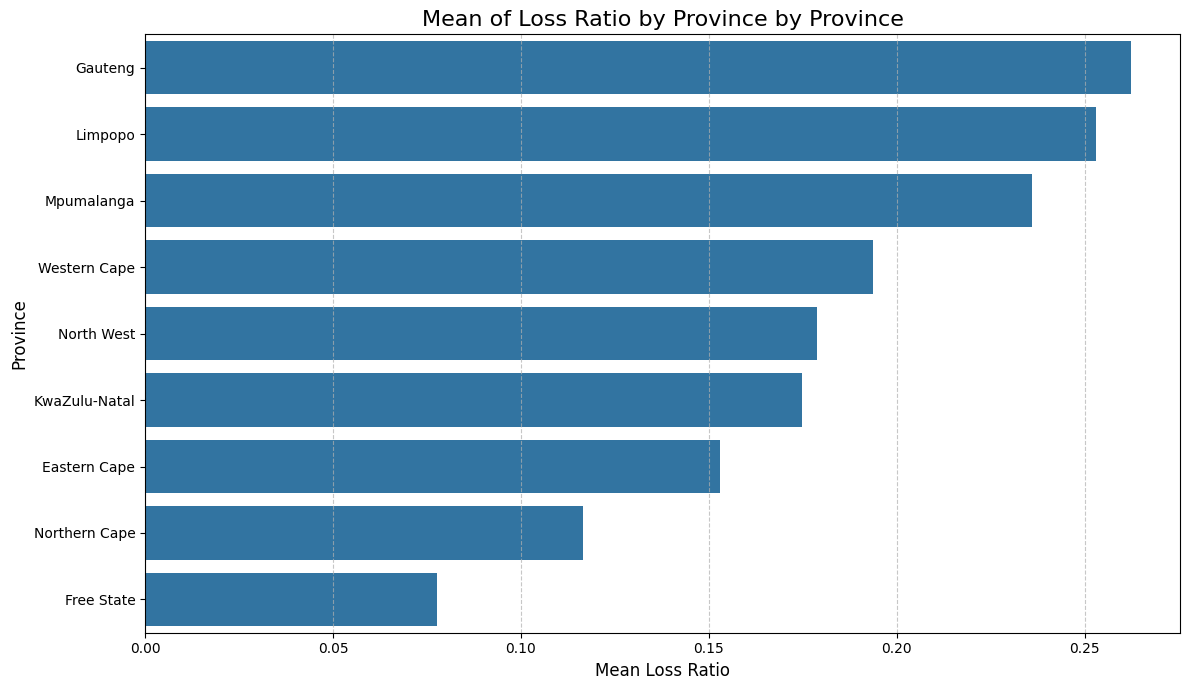

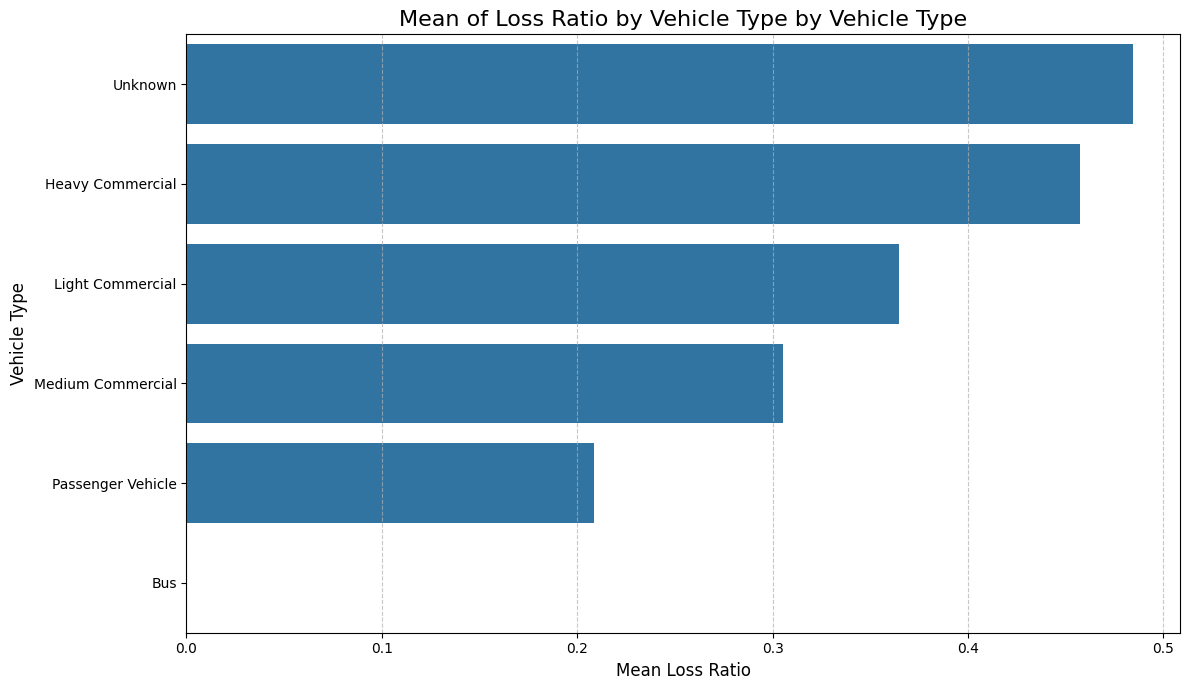

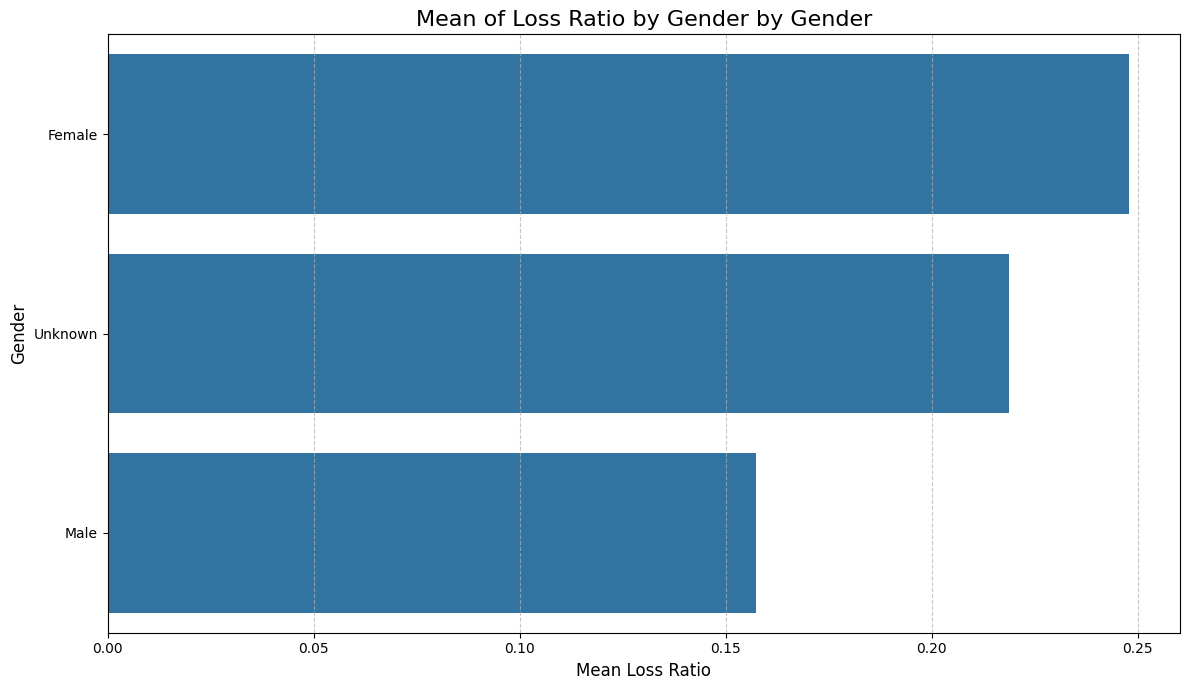

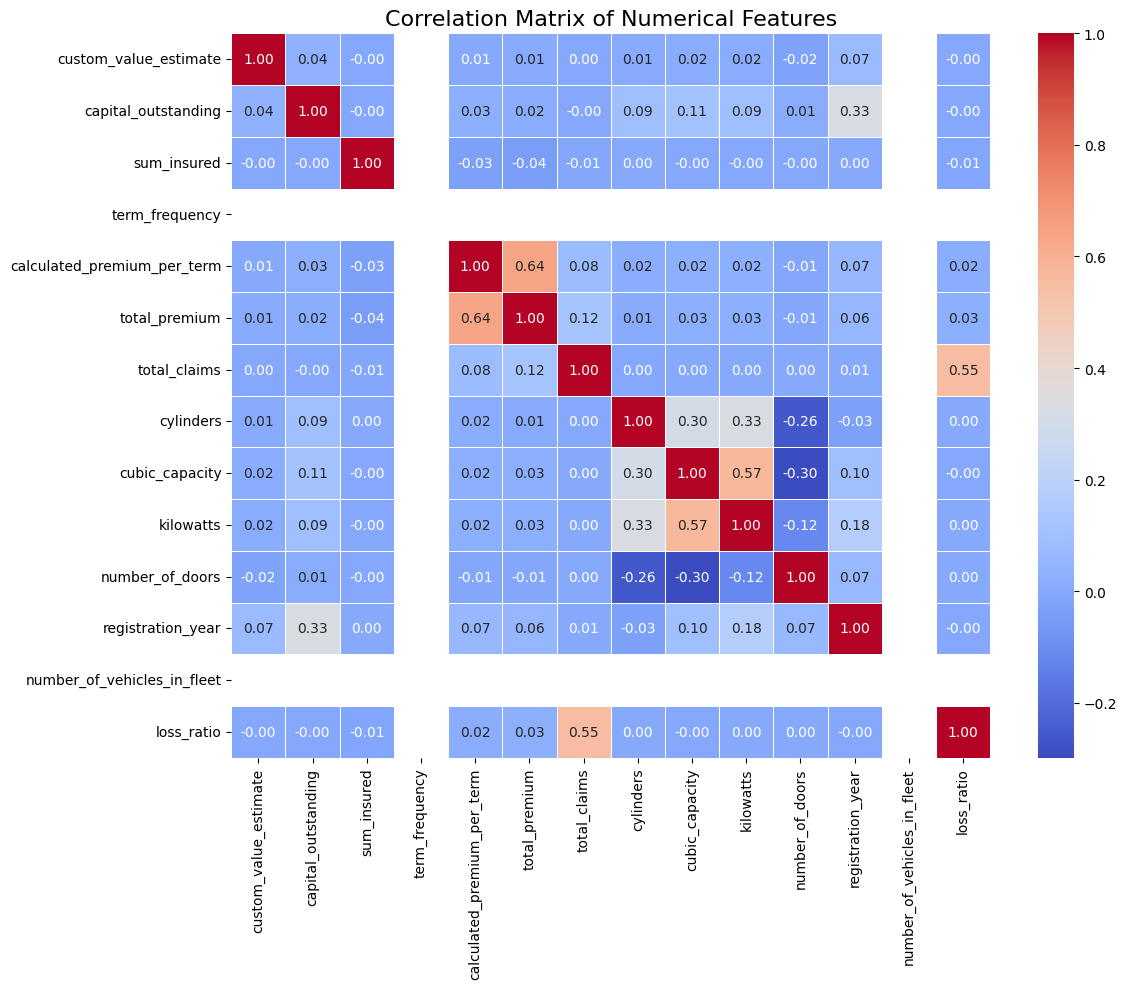

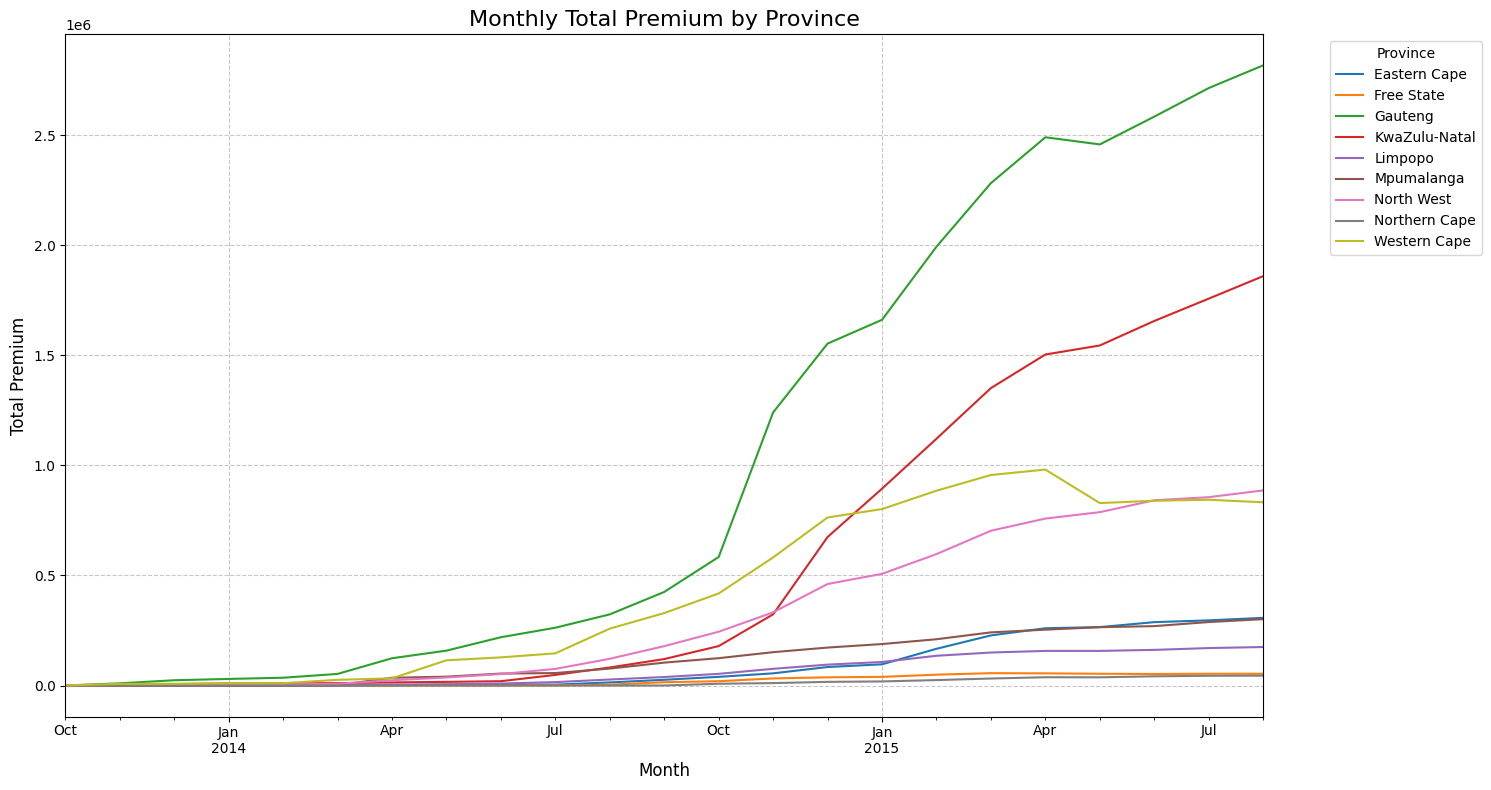


--- EDA Complete. Review generated plots and summaries for insights. ---


In [2]:
# notebooks/01_eda_and_data_understanding.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# --- NEW ADDITION: Explicitly change CWD if notebook is launched from 'notebooks' subfolder ---
current_dir_name = os.path.basename(os.getcwd())
if current_dir_name == 'notebooks':
    os.chdir('..') # Move up one directory to the project root
    print("Changed current working directory to:", os.getcwd())
# --- END NEW ADDITION ---

# Add the project root to the system path (this should now be the project root)
# The `.` refers to the current working directory, which is now the project root.
sys.path.append(os.path.abspath('.'))

# Import modules explicitly from the 'src' package
from src.utils import (
    load_raw_data, get_data_summary, check_missing_values,
    plot_numerical_distribution, plot_categorical_distribution,
    plot_bivariate_categorical_numerical, plot_correlation_matrix
)
from src.data_tools import preprocess_data, save_processed_data, load_processed_data

# --- Load Data ---
print("--- Loading Raw Data (MachineLearningRating_v3.txt) ---")


df_raw = load_raw_data(file_path='Data/MachineLearningRating_v3.txt')

if df_raw is None:
    print("Exiting EDA due to data loading error.")
else:
    # ... rest of your notebook code ...
    # --- Initial Data Summary (before full cleaning) ---
    print("\n--- Initial Data Summary ---")
    get_data_summary(df_raw)

    # --- Check Missing Values (Initial) ---
    print("\n--- Initial Missing Values Report ---")
    missing_report = check_missing_values(df_raw)
    if missing_report is not None and not missing_report.empty:
        print(missing_report)
    else:
        print("No missing values found initially.")

    # --- Preprocess Data (using data_tools) ---
    print("\n--- Starting Data Preprocessing ---")
    df_processed = preprocess_data(df_raw.copy()) # Work on a copy to preserve raw
    print("\n--- Data after Preprocessing ---")
    get_data_summary(df_processed) # Check info again

    # --- Save Processed Data ---
    if df_processed is not None:
        save_processed_data(df_processed)

    # --- Re-check Missing Values (after preprocessing) ---
    print("\n--- Missing Values Report After Preprocessing ---")
    missing_report_processed = check_missing_values(df_processed)
    if missing_report_processed is not None and not missing_report_processed.empty:
        print(missing_report_processed)
    else:
        print("No missing values found after preprocessing.")

    # --- Exploratory Data Analysis (EDA) on Processed Data ---

    # Overall Loss Ratio (already calculated in preprocess_data)
    if 'loss_ratio' in df_processed.columns:
        overall_loss_ratio = df_processed['loss_ratio'].mean()
        print(f"\nOverall Portfolio Loss Ratio: {overall_loss_ratio:.4f}")
        plot_numerical_distribution(df_processed, 'loss_ratio', 'Loss Ratio Distribution')

    # Distribution of key financial variables
    plot_numerical_distribution(df_processed, 'total_premium', 'Total Premium')
    plot_numerical_distribution(df_processed, 'total_claims', 'Total Claims')
    plot_numerical_distribution(df_processed, 'custom_value_estimate', 'Custom Value Estimate')

    # Are there temporal trends? Did the claim frequency or severity change over the 18-month period?
    if 'transaction_month' in df_processed.columns:
        monthly_summary = df_processed.groupby(df_processed['transaction_month'].dt.to_period('M')).agg(
            total_premium_sum=('total_premium', 'sum'),
            total_claims_sum=('total_claims', 'sum'),
            policy_count=('policy_id', 'nunique')
        ).reset_index()
        monthly_summary['transaction_month'] = monthly_summary['transaction_month'].dt.to_timestamp() # Convert back for plotting

        plt.figure(figsize=(15, 6))
        sns.lineplot(data=monthly_summary, x='transaction_month', y='total_premium_sum', label='Total Premium')
        sns.lineplot(data=monthly_summary, x='transaction_month', y='total_claims_sum', label='Total Claims')
        plt.title('Monthly Trends: Total Premium vs. Total Claims', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Amount', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Monthly Loss Ratio Trend
        monthly_summary['monthly_loss_ratio'] = monthly_summary['total_claims_sum'] / monthly_summary['total_premium_sum']
        monthly_summary['monthly_loss_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True) # Handle division by zero resulting in inf
        monthly_summary.dropna(subset=['monthly_loss_ratio'], inplace=True) # Drop months where premium was 0

        plt.figure(figsize=(15, 6))
        sns.lineplot(data=monthly_summary, x='transaction_month', y='monthly_loss_ratio')
        plt.title('Monthly Loss Ratio Trend', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Loss Ratio', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


    # Which vehicle makes/models are associated with the highest and lowest claim amounts?
    plot_bivariate_categorical_numerical(df_processed, 'make', 'total_claims', title='by Vehicle Make', top_n=15)
    # plot_bivariate_categorical_numerical(df_processed, 'model', 'total_claims', title='by Vehicle Model', top_n=15) # Might be too many unique models

    # --- Other EDA from Minimum Essential To Do ---

    # Univariate Analysis for Categorical Columns
    plot_categorical_distribution(df_processed, 'province', 'Province Distribution')
    plot_categorical_distribution(df_processed, 'vehicle_type', 'Vehicle Type Distribution')
    plot_categorical_distribution(df_processed, 'gender', 'Gender Distribution')
    plot_categorical_distribution(df_processed, 'marital_status', 'Marital Status Distribution')


    # Bivariate/Multivariate Analysis: Correlations and Associations
    # Loss Ratio by Province, VehicleType, Gender
    plot_bivariate_categorical_numerical(df_processed, 'province', 'loss_ratio', 'by Province', top_n=10)
    plot_bivariate_categorical_numerical(df_processed, 'vehicle_type', 'loss_ratio', 'by Vehicle Type', top_n=10)
    plot_bivariate_categorical_numerical(df_processed, 'gender', 'loss_ratio', 'by Gender')

    # Correlations between numerical features
    numerical_cols = [
        'custom_value_estimate', 'capital_outstanding', 'sum_insured',
        'term_frequency', 'calculated_premium_per_term', 'total_premium',
        'total_claims', 'cylinders', 'cubic_capacity', 'kilowatts',
        'number_of_doors', 'registration_year', 'number_of_vehicles_in_fleet',
        'loss_ratio' # Include engineered feature
    ]
    plot_correlation_matrix(df_processed, numerical_cols)

    # Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc.
    # This requires more complex plotting (e.g., stacked bar charts over time by province)
    # Example: Total Premium by Province over Time (monthly)
    if 'transaction_month' in df_processed.columns:
        province_monthly_premium = df_processed.groupby([df_processed['transaction_month'].dt.to_period('M'), 'province'])['total_premium'].sum().unstack(fill_value=0)
        province_monthly_premium.index = province_monthly_premium.index.to_timestamp() # Convert back for plotting

        plt.figure(figsize=(15, 8))
        province_monthly_premium.plot(kind='line', ax=plt.gca()) # Plotting directly from DataFrame
        plt.title('Monthly Total Premium by Province', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Total Premium', fontsize=12)
        plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Outlier Detection (using box plots - already demonstrated with numerical distributions)
    # Review plots for Total_Premium, Total_Claims, Custom_Value_Estimate for outliers.

    print("\n--- EDA Complete. Review generated plots and summaries for insights. ---")